# Identificar fronteras no lineales

Aqui es donde las SVM muestran todo su potencial

In [1]:
from sklearn.datasets.samples_generator import make_circles, make_blobs

In [2]:
X,Y = make_circles(100,factor=.1, noise=.1)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC #Support Vector Classifier

In [4]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:#si no existe ningun dibujo creado
        ax = plt.gca()
    xlim = ax.get_xlim()#la anterior xx
    ylim = ax.get_ylim()#la anterior yy
    
    #Generamos parrilla de puntos para evaluar el modelo
    xx= np.linspace(xlim[0], xlim[1],30)
    yy= np.linspace(ylim[0], ylim[1],30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T #La T es para hacer una tupla
    P = model.decision_function(xy).reshape(X.shape)
    
    
    #Representamos las fronteras y margenes de SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--","-","--"])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300, linewidth=1, facecolors="black")
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

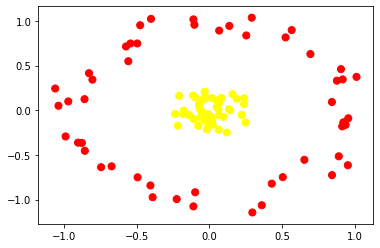

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

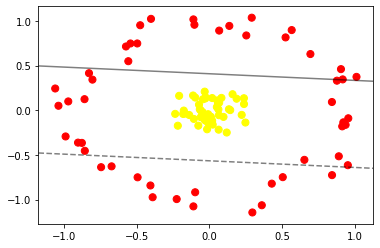

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [7]:
r = np.exp(-(X**2).sum(1))

In [8]:
r

array([0.99613648, 0.47909886, 0.99270089, 0.44947029, 0.97982808,
       0.39089557, 0.99666868, 0.34368182, 0.96597635, 0.99647655,
       0.98974488, 0.98417823, 0.94989629, 0.98195402, 0.31216394,
       0.28928707, 0.3564401 , 0.99730439, 0.97388415, 0.40437094,
       0.31405436, 0.92637894, 0.46444488, 0.46523646, 0.35103467,
       0.416604  , 0.44194219, 0.9441453 , 0.97010169, 0.32190106,
       0.38265782, 0.41507069, 0.39786532, 0.41987752, 0.99431324,
       0.42581888, 0.98856518, 0.92525948, 0.38141821, 0.979108  ,
       0.32434002, 0.42756773, 0.97451359, 0.98527874, 0.98608939,
       0.35296935, 0.99614142, 0.94421406, 0.41985384, 0.43170088,
       0.38473929, 0.99084863, 0.4231356 , 0.27619058, 0.54127302,
       0.96478223, 0.33825663, 0.96914843, 0.44647512, 0.29849614,
       0.3048723 , 0.98125317, 0.3892759 , 0.34682484, 0.97787901,
       0.97827718, 0.40417422, 0.42297735, 0.93268248, 0.38627885,
       0.33196589, 0.99461413, 0.97078208, 0.30977548, 0.99793

In [9]:
from mpl_toolkits import mplot3d

In [10]:
def plot_3D(elev=30, azim=30, X=X,Y=Y,r=r):
        ax = plt.subplot(projection="3d")
        ax.scatter3D(X[:,0], X[:,1], r, c=Y, s=50, cmap="autumn")
        ax.view_init(elev=elev,azim=azim)
        
        ax.set_xlabel("x[0]")
        ax.set_ylabel("x[1]")
        ax.set_zlabel("r")

In [11]:
from ipywidgets import interact, fixed

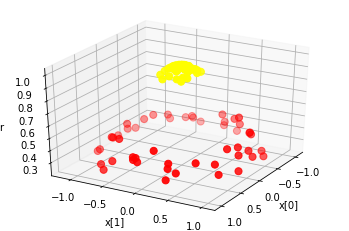

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.0615804 ,  0.00888022],
       [ 0.65348667, -0.55570089],
       [ 0.0647372 , -0.0559908 ],
       [ 0.06679553,  0.89175326],
       [ 0.14274573,  0.00134306],
       [ 0.52390641,  0.81537532],
       [-0.04636506, -0.03445516],
       [-0.99082932, -0.29376223],
       [-0.18127201, -0.04190924],
       [-0.05932959, -0.00310925],
       [ 0.05828243,  0.08313381],
       [-0.00639807, -0.12612428],
       [ 0.06308275, -0.21776831],
       [-0.02882647,  0.1318326 ],
       [ 1.01229556,  0.37347622],
       [ 0.84386683, -0.72679057],
       [ 0.9054284 ,  0.46020483],
       [-0.04684694, -0.02246357],
       [ 0.02211548, -0.16116399],
       [ 0.93738201, -0.16351639],
       [ 0.29089762,  1.03613115],
       [ 0.11875937, -0.2497361 ],
       [-0.80596956,  0.34252803],
       [ 0.25344314,  0.83724313],
       [-0.11070705,  1.01715988],
       [-0.40664014, -0.842771  ],
       [ 0.50465375, -0.74960042],
       [

In [12]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], azim=[-180,-150,-120,90,-60,-30,0,30,60,90,120,150,160,180], X= fixed(X), Y= fixed(Y), r= fixed(r))#creo slider 
#esa N la tuve que cambiar manualmente de -90 o 200 para ver como cambia el grafico y aun se conservan los
#mismos puntos de soporte

### Radial bassis function

In [13]:
rbf = SVC(kernel="rbf", C=1E6, gamma="auto")
rbf.fit(X,Y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

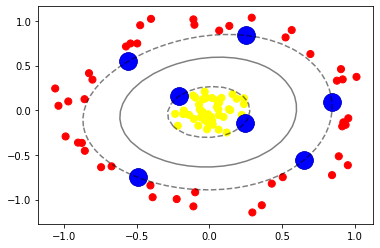

In [14]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn") #dibujo todos los puntos
plt_svc(rbf)#incorporo lineas radiales
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")#muestro los support vectors

Consulta los diferentes tipos de SVC:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

## Ajustar los parametros de la SVM

In [16]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2) #cluster_std= desviacion estandar

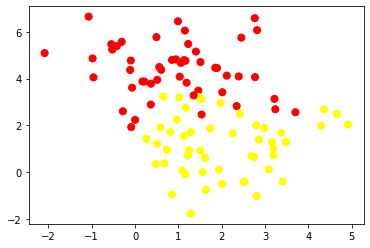

In [23]:
plt.scatter(X[:,0], X[:,1], c= Y, s=50, cmap="autumn")

Hacer una separacion lineal en esta distribucion resulta muy complicado.
Los datos estan mezclados tanto que es imposible hacer una separacion efectiva

Veamos un ejemplo modificando el valor de cluster_std

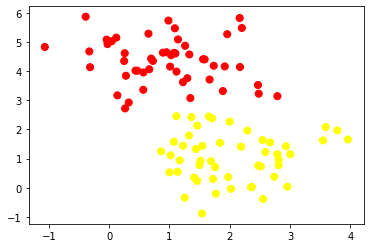

In [24]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8) #cluster_std= desviacion estandar
plt.scatter(X[:,0], X[:,1], c= Y, s=50, cmap="autumn")

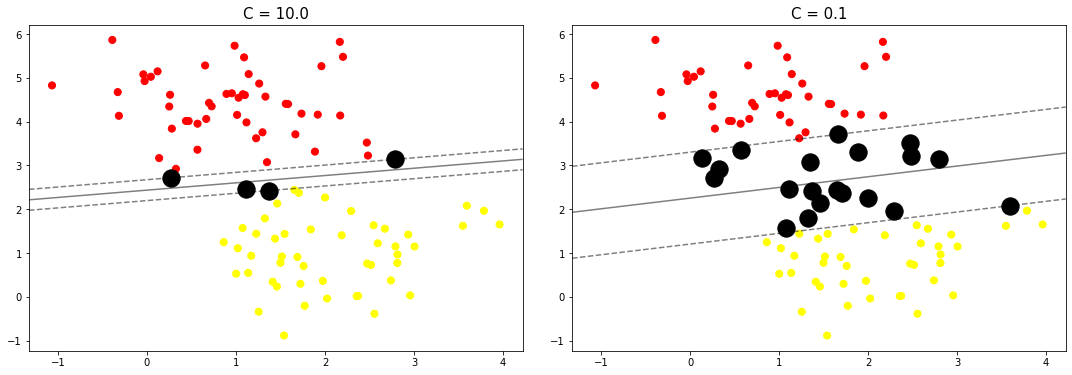

In [28]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.05,right=0.95,wspace=0.1)

for ax_i, C in zip(ax, [10.0,0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")#c indica color de la paleta de colores
    plt_svc(model,ax_i) #paso esto a mi funcion
    ax_i.set_title("C = {0:.1f}".format(C), size=15)

## Como encontrar el valor de c optimo? (el valor de tolerancia)
Dependera mucho del datoset
* Es necesario en muchas ocasiones usar la validacion cruzada para "tunear" el valor
* Entre mas flexible se es, mas puntos quedan dentro de los margenes del SVM

In [29]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2) #cluster_std= desviacion estandar

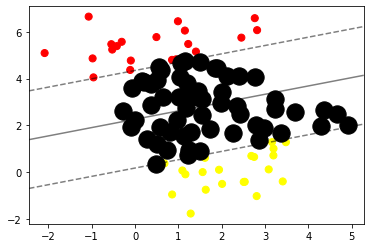

In [31]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
model= SVC(kernel="linear", C=0.01)#el valor de C determina mi permisividad en el pasillo del SVM
model.fit(X,Y)
plt_svc(model)
